In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


import numpy as np
import os
import shutil

output_folder = 'results/final/'
# output_folder = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder = 'run_1/mpi/data/output/'
# output_folder = 'run_2(mac)/data/output/'

# If fig folder exists remove it and its contents recursively
# if os.path.exists(output_folder+"fig/"):
#     shutil.rmtree(output_folder+"fig/")
# os.mkdir(output_folder+"fig/")

# labelsize = 25
# fontsize = 28 

fontsize = 28
labelsize = 20

In [2]:
output_folder2 = '/Users/nus/hg-core-decomposition/backup_output/mpi/data/output/'
# output_folder2 = '/Users/nus/hg-core-decomposition/run_par/mpi/data/output/'
df2 = pd.read_csv(output_folder2+"result.csv", header = None)
df2.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']
# df2 = df2.loc[df2['algo'].isin(['naive_nbr','improved_nbr'])]
print(df2.shape)
df2.dataset.unique()

(83, 25)


array(['pref', 'pref_20000', 'pref_40000', 'pref_60000', 'pref_80000'],
      dtype=object)

In [5]:
df = pd.read_csv("data/output/server/result(except pref).csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")

# Includes local algorithm statistics
df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']

# Includes h-indextime
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#Includes core-correctiontime (no h-index/core-numbers )
# df.columns = ['algo', 'bucket update time', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

#includes core numbers as well (but no h-index)
# df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']

# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'subgraph computation time', 'total iteration']
print(df.shape)
# df.tail(10)

(160, 25)


In [6]:
df = pd.concat([df,df2])
df.shape

(243, 25)

In [ ]:
# # df = pd.read_csv("data/output/result.csv", header=None)
# df = pd.read_csv(output_folder+"result.csv")
# df.columns = ['algo', 'bucket update time', 'core', 'dataset', 'degree call time', 'execution time', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'param_s']
# print(df.shape)
# # df

In [10]:
good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Execution time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Sum Core-correction vol',
    'tau': '#Iterations'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

good_name_dataset = {
    'bin_2': 'bin4U',
    'bin_5': 'bin3U', 
    'pref': 'pref3U', 
    "enron" : "enron",
    "congress" : "congress",
    "contact" : "contact",
    "dblp": "dblp",
    "syn" : "syn",
    "bin_4" : "bin_4",
    "bin_1" : "bin_1",
    "pref_20000": "pref20000",
    "pref_40000": "pref40000",
    "pref_60000": "pref60000",
    "pref_80000": "pref80000",
    "pref_100000": "pref100000"
}
order=["Peel", "E-Peel", "Local-core"]
linewidth= 2
scatterplotBall = 150
save = True

### Execution time Plots

dataset   algo      
congress  E-Peel          231.126268
          Local-core      166.291690
          Peel            238.089251
dblp      E-Peel           97.419941
          Local-core     2305.338741
          Peel            317.659950
pref3U    E-Peel        30576.804145
          Local-core       32.589584
          Peel          32064.844540
Name: execution time, dtype: float64
large_execution_time


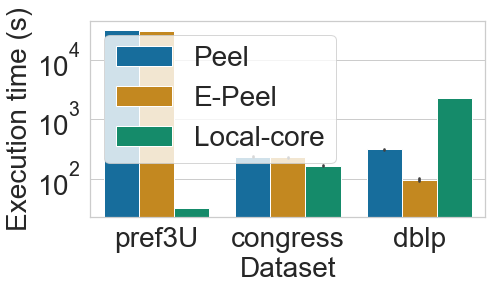

small_execution_time


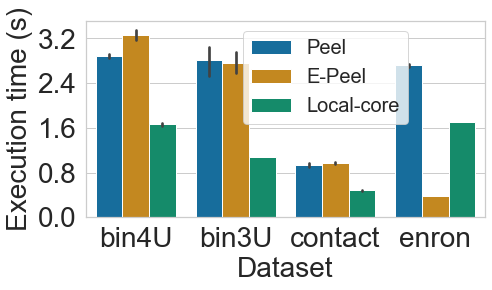

<Figure size 504x288 with 0 Axes>

In [10]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

save = False

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
include_algos = ['naive_nbr','improved_nbr_simple','opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'execution time'  

print(working_df.groupby(['dataset','algo'])['execution time'].mean())
# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
# columns = ['execution time']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'execution time'  

# print(working_df.groupby(['dataset','algo'])[y_axis].mean())
# _min = working_df[y_axis].min()
# donotdrawline = working_df[y_axis].max() <= 20*_min
# working_df[y_axis] = working_df[y_axis].apply(lambda x: [x, 20*_min][x > 20*_min] )  
ax = sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
ax.yaxis.set_major_locator(MaxNLocator(5)) 
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
plt.legend(loc = 'upper center', bbox_to_anchor=(0.6,1), fontsize=labelsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

Memory Footprint Plot
------------

In [98]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

include_algos = ['naive_nbr','improved_nbr_simple','opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'memory taken' 

ax = sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
# plt.setp(ax.get_legend().get_texts(), fontsize=2*fontsize) # for legend text
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
plt.legend(loc = 'best', fontsize=fontsize)
# plt.legend()
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
# columns = ['execution time']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'memory taken' 



ax = sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
ax.yaxis.set_major_locator(MaxNLocator(5)) 
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
plt.legend(loc = 'lower left', fontsize=fontsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x288 with 0 Axes>

### Efficiency Analysis (Peel vs E-Peel)

In [99]:
# ratio between #neighbourhood recomputations
from matplotlib import pyplot as plt 
import seaborn as sns 
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# save = True


sns.set(rc={'figure.figsize':(7,4)})
sns.set(font='serif')
sns.set_style("whitegrid", {'axes.grid' : True})

order=["Peel", "E-Peel"]
include_algos = ['naive_nbr','improved_nbr_simple']
include_datasets = ['bin_5', 'bin_2','contact', 'enron']
# columns = ['bucket update time', 'neighborhood call time', 'subgraph computation time', 'num neighborhood computation']
columns = ['num neighborhood computation']
# Synthetic dataset
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['ratio(subg.time,total)'] = working_df['subgraph computation time']/working_df['execution time']
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
print(working_df.algo.unique())

nb_datasets = []
nb_alphas = []
nb_ets = [] 
for y_axis in columns:
    if y_axis == 'num neighborhood computation':
        X = [] 
        Alpha = []
        mean_exectime_ratio = []
        for key, item in working_df.groupby('dataset', as_index=False):
            peel_nb = item[item.algo == 'Peel'][y_axis]
            peel_nb = pd.to_numeric(peel_nb)
            peel_et = pd.to_numeric(item[item.algo == 'Peel']['execution time']).mean()

            epeel_nb = item[item.algo == 'E-Peel'][y_axis]
            epeel_nb = pd.to_numeric(epeel_nb)
            epeel_et = pd.to_numeric(item[item.algo == 'E-Peel']['execution time']).mean()

            alpha = np.divide(epeel_nb.values,peel_nb.values)
            X.append(key)
            Alpha.append(alpha[0]) # Every run gives the same value for #nb.
            mean_exectime_ratio.append(epeel_et/peel_et)
        
        sns.barplot(x = X, y = Alpha, order = include_datasets, color='k')
        plt.xlabel('Dataset', fontsize=fontsize)
        plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        # plt.legend(loc = 'best', fontsize=fontsize)
        plt.tight_layout()
        filename = "small_alpha"
        if(save):
            plt.savefig("results_final/fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()

        nb_datasets += X 
        nb_alphas += Alpha
        nb_ets += mean_exectime_ratio
        # sns.lineplot(x = mean_exectime_ratio, y = Alpha)
        # plt.xlabel('exec time ratio', fontsize=fontsize)
        # plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        # plt.xticks(fontsize=fontsize)
        # plt.yticks(fontsize=fontsize)
        # # plt.legend(loc = 'best', fontsize=fontsize)
        # plt.tight_layout()
        # filename = "small_alphavset"
        # if(save):
        #     plt.savefig("results_final/fig/" + filename + ".pdf")
        # else:
        #     print(filename)
        #     plt.show()
        # plt.clf()
        # peel_et = working_df[working_df.algo == 'Peel']['execution time']
        # epeel_et = working_df[working_df.algo == 'E-Peel']['execution time']
        # alpha = epeel_et/peel_et
        # print(alpha.values)
    sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
    plt.xlabel('Dataset', fontsize=fontsize)
    plt.ylabel(good_name[y_axis], fontsize=fontsize)
    # plt.yscale("log")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.title()
    # plt.legend(loc = 'best', fontsize=fontsize)
    plt.tight_layout()
    filename = ("small " + y_axis).replace(" ", "_")
    if(save):
        plt.savefig("results_final/fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()


    if(not save):
        break

# Real dataset
include_datasets = ['pref','congress','dblp']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df['ratio(subg.time,total)'] = working_df['subgraph computation time']/working_df['execution time']
working_df['param_s'] = working_df['param_s'].astype(int)
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
for y_axis in columns:
    if y_axis == 'num neighborhood computation':
        X = [] 
        Alpha = []
        mean_exectime_ratio = []
        for key, item in working_df.groupby('dataset', as_index=False):
            peel_nb = item[item.algo == 'Peel'][y_axis]
            peel_nb = pd.to_numeric(peel_nb)
            peel_et = pd.to_numeric(item[item.algo == 'Peel']['execution time']).mean()

            epeel_nb = item[item.algo == 'E-Peel'][y_axis]
            epeel_nb = pd.to_numeric(epeel_nb)
            epeel_et = pd.to_numeric(item[item.algo == 'E-Peel']['execution time']).mean()
            print(key)
            print(epeel_nb.values, ' ', peel_nb.values)
            alpha = np.divide(epeel_nb.values,peel_nb.values)
            X.append(key)
            Alpha.append(alpha[0]) # Every run gives the same value for #nb.
            mean_exectime_ratio.append(epeel_et/peel_et)
        
        nb_datasets += X 
        nb_alphas += Alpha
        nb_ets += mean_exectime_ratio
        # print(mean_exectime_ratio)
        sns.barplot(x = X, y = Alpha, order = include_datasets, color = 'k')
        plt.xlabel('Dataset', fontsize=fontsize)
        plt.ylabel(r"${\alpha}$", fontsize=fontsize)
        plt.xticks(fontsize=fontsize)
        plt.yticks(fontsize=fontsize)
        # plt.legend(loc = 'best', fontsize=fontsize)
        plt.tight_layout()
        filename = "large_alpha"
        if(save):
            plt.savefig("results_final/fig/" + filename + ".pdf")
        else:
            print(filename)
            plt.show()
        plt.clf()
    sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind',hue_order = order, order = include_datasets)
    plt.xlabel('Dataset', fontsize=fontsize)
    plt.ylabel(good_name[y_axis], fontsize=fontsize)
    plt.yscale("log")
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    # plt.title()
    plt.legend(loc = 'best', fontsize=fontsize)
    plt.tight_layout()
    filename = ("large " + y_axis).replace(" ", "_")
    if(save):
        plt.savefig("results_final/fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()


['E-Peel' 'Peel']
congress
[223250. 223250. 223250. 223250. 223250.]   [224583. 224583. 224583. 224583. 224583.]
dblp
[1603526. 1603526. 1603526. 1603526. 1603526.]   [6180015. 6180015. 6180015. 6180015. 6180015.]
pref3U
[271423. 271423. 271423. 271423.]   [396767. 396767. 396767. 396767.]


<Figure size 504x288 with 0 Axes>

Speedup vs Alpha
----------

In [100]:
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(7,4)})
sns.set(font='serif')
sns.set_style("whitegrid", {'axes.grid' : True})

save = True 

new_X = [] 
new_Y = []
new_names = []
speedup = 1/np.array(nb_ets)
speedup = speedup.tolist()
print(speedup[0])
for i, dname in enumerate(nb_datasets):
    if (dname == 'enron' or dname=='dblp' or dname=='pref3U'):
        new_X.append(nb_alphas[i])
        new_Y.append(speedup[i])
        new_names.append(dname)
ax = sns.scatterplot(x = new_X, y = new_Y,  marker='o', color = 'k', s = scatterplotBall)
# from matplotlib.ticker import MaxNLocator
ax.yaxis.set_major_locator(MaxNLocator(5)) 
# g.set_xticks([0.2,0.4,0.6,0.7,0.75,0.8,0.85,0.9,0.95,1.0])
plt.xlabel(r"${\alpha}$", fontsize=fontsize)
plt.ylabel('Avg. speedup', fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.ylim(0,8)
plt.xlim(0.2,0.8)
i = 0
for x,y in zip(new_X,new_Y):
    plt.text(x+0.01, y+0.1, new_names[i], fontsize=fontsize+2)
    i+=1
# plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
if(save):
    plt.savefig("results_final/fig/speedupvsalpha.pdf")
else:
    print(filename)
    plt.show()
plt.clf()

1.0155284189605023


<Figure size 504x288 with 0 Axes>

Efficiency Analysis (Local-Core)
---------

In [101]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
# ax.yaxis.set_major_locator(MaxNLocator(6)) 
# sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize='large')
# plt.rc('ytick', labelsize='large')

# fontsize = 24
# labelsize = 20

# save = False 


order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# # columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'tau' 
 

ax = sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
ax.yaxis.set_major_locator(MaxNLocator(6)) 
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'tau' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x288 with 0 Axes>

Convergence (Core-correction Volume)
-------

In [102]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
# ax.yaxis.set_major_locator(MaxNLocator(6)) 
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

# save = True


good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Core-correct. vol.',
    'tau': r'#Iterations (${\tau}$)'
    # 'num_threads' : '#Threads'
}

order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
include_datasets = ['pref','congress','dblp']
# # columns = ['execution time']

working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'sum_core_correction_volume' 
 

sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
filename = ("large " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
y_axis = 'sum_core_correction_volume' 
 

ax = sns.barplot(x='dataset', y=y_axis, data=working_df, color='k', order = include_datasets)
ax.yaxis.set_major_locator(MaxNLocator(6)) 
# plt.xlabel('Dataset')
# plt.ylabel(good_name[y_axis])
# plt.legend()
plt.xlabel('Dataset', fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
# plt.yscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
# plt.title()
# plt.legend(loc = 'best', fontsize=fontsize)
plt.tight_layout()
filename = ("small " + y_axis).replace(" ", "_")
if(save):
    plt.savefig("results_final/fig/" + filename + ".pdf")
else:
    print(filename)
    plt.show()
plt.clf()

<Figure size 504x288 with 0 Axes>

Convergence (Core-correction vol vs Exectime)
-------

In [107]:
import matplotlib.pyplot as plt 
import seaborn as sns 
from matplotlib.ticker import MaxNLocator

sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})


save = True 


good_name = {
    'bucket update time' : 'Bucket time (s)', 
    'execution time' : "Execution time (s)", 
    'neighborhood call time' : "NB time (s)", 
    'subgraph computation time' : "Sub time(s)",
    'num bucket update' : "#bucket", 
    'num neighborhood computation' : "#nb",
    'num subgraph call' : "#subgraph",
    'outerloop time': "outloop time(s)",
    'init time': 'init time(s)',
    'total iteration': '#total iterations',
    'inner iteration': '#inner iterations',
    'memory taken': 'Memory (MB)',
    'core_correction time': 'Core-corection time(s)',
    'h_index_time': 'h-index time(s)',
    'sum_core_correction_volume' : 'Core-correct. vol.',
    'tau': r'#Iterations (${\tau}$)'
    # 'num_threads' : '#Threads'
}

# NBR(1) adopts Arijits simplification to Bishwa's simplification.
good_name_algo = {
    'naive_nbr' : "Peel", 
    'improved_nbr_simple': "E-Peel", 
    'recursive_local_core': "LOCAL(r)",
    'iterative_local_core': "LOCAL(i)",
    'bst_local_core': "LOCAL(b)",
    'improved_local_core': "LOCAL(im)",
    'opt_local_core': "Local-core",
    'par_local_core': "LOCAL(p)",
    'improved2_nbr' : "NBR(2)",
    'par_improved2_nbr' : "pNBR(2)",
    'par_improved3_nbr' : "pNBR(3)",
    'naive_degree' : "DEG"
}

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
order=["Local-Core"]
include_algos = ['opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']

include_datasets = ['pref','congress','dblp']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
x_axis = 'sum_core_correction_volume' 
y_axis = 'execution time'

xlabels = working_df.groupby('dataset')[x_axis].mean().index.values
_em = working_df.groupby('dataset')[y_axis].mean()
_cm = working_df.groupby('dataset')[x_axis].mean()
exec_mean = [] 
cv_mean = [] 
# print(_em)
# print(_cm)
for key in xlabels:
    # print(key, _em.loc[key],_cm.loc[key])
    exec_mean.append(_em.loc[key])
    cv_mean.append(_cm.loc[key])

print(xlabels)
ax = sns.scatterplot(x = cv_mean, y = exec_mean,  marker='o', color = 'k', s = scatterplotBall)
# ax.yaxis.set_major_locator(MaxNLocator(5)) 
plt.xlabel(good_name[x_axis], fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

i = 0
for x,y in zip(cv_mean, exec_mean):
    plt.text(x+0.01, y+0.1, xlabels[i], fontsize=fontsize)
    i+=1
# plt.legend(loc = 'best', fontsize=fontsize)
plt.xscale("log")
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()
if(save):
    plt.savefig("results_final/fig/large_localcore_exec.pdf")
else:
    print(filename)
    plt.show()
plt.clf()


include_datasets = ['bin_2','bin_5','contact','enron']
working_df = df[df['dataset'].isin(include_datasets)].copy()
working_df = working_df[working_df['algo'].isin(include_algos)].copy()
working_df = working_df.replace({"algo": good_name_algo})
working_df = working_df.replace({"dataset": good_name_dataset})
include_datasets = [good_name_dataset[d] for d in include_datasets]
x_axis = 'sum_core_correction_volume' 
y_axis = 'execution time'

xlabels = working_df.groupby('dataset')[x_axis].mean().index.values
_em = working_df.groupby('dataset')[y_axis].mean()
_cm = working_df.groupby('dataset')[x_axis].mean()
exec_mean = [] 
cv_mean = [] 
# print(_em)
# print(_cm)
for key in xlabels:
    # print(key, _em.loc[key],_cm.loc[key])
    exec_mean.append(_em.loc[key])
    cv_mean.append(_cm.loc[key])

print(xlabels)
ax = sns.scatterplot(x = cv_mean, y = exec_mean,  marker='o', color = 'k', s = scatterplotBall)
# ax.yaxis.set_major_locator(MaxNLocator(5)) 
plt.xlabel(good_name[x_axis], fontsize=fontsize)
plt.ylabel(good_name[y_axis], fontsize=fontsize)
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)

i = 0
for x,y in zip(cv_mean, exec_mean):
    plt.text(x+0.01, y+0.1, xlabels[i], fontsize=fontsize+2)
    i+=1
# plt.legend(loc = 'best', fontsize=fontsize)
# plt.xscale("log")
ax.xaxis.set_major_locator(MaxNLocator(5)) 
ax.yaxis.set_major_locator(MaxNLocator(5)) 
plt.xticks(fontsize=fontsize)
plt.yticks(fontsize=fontsize)
plt.tight_layout()
if(save):
    plt.savefig("results_final/fig/small_localcore_exec.pdf")
else:
    print(filename)
    plt.show()
plt.clf()

['congress' 'dblp' 'pref3U']
['bin3U' 'bin4U' 'contact' 'enron']


<Figure size 504x288 with 0 Axes>

In [104]:
# import matplotlib.pyplot as plt 
# # import seaborn as sns 
# # sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# # plt.rc('font', family='serif')
# # plt.rc('xtick', labelsize='large')
# # plt.rc('ytick', labelsize='large')

# # fontsize = 24
# # labelsize = 20

# save = False 



# # columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# # columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# # columns = ['execution time','sum_core_correction_volume', 'tau']
# good_name = {
#     'bucket update time' : 'Bucket time (s)', 
#     'execution time' : "Time (s)", 
#     'neighborhood call time' : "NB time (s)", 
#     'subgraph computation time' : "Sub time(s)",
#     'num bucket update' : "#bucket", 
#     'num neighborhood computation' : "#nb",
#     'num subgraph call' : "#subgraph",
#     'outerloop time': "outloop time(s)",
#     'init time': 'init time(s)',
#     'total iteration': '#total iterations',
#     'inner iteration': '#inner iterations',
#     'memory taken': 'Memory (MB)',
#     'core_correction time': 'Core-corection time(s)',
#     'h_index_time': 'h-index time(s)',
#     'sum_core_correction_volume' : 'Core-correct. vol.',
#     'tau': r'#Iterations (${\tau}$)'
#     # 'num_threads' : '#Threads'
# }

# # order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
# order=["Local-Core"]
# include_algos = ['opt_local_core']

# y_axis = 'sum_core_correction_volume' 
# x_axis = 'execution time'
# include_datasets = ['contact','enron','pref','congress','dblp']
# # sns.scatterplot(x=x_axis, y=y_axis, data=df, color='k', hue = 'dataset',hue_order=include_datasets)
# # plt.show()

# # include_datasets = ['pref','congress','dblp']
# # # columns = ['execution time']



# # working_df = df[df['dataset'].isin(include_datasets)].copy()
# # working_df = working_df[working_df['algo'].isin(include_algos)].copy()
# # working_df = working_df.replace({"algo": good_name_algo})
# # working_df = working_df.replace({"dataset": good_name_dataset})
# # include_datasets = [good_name_dataset[d] for d in include_datasets]
# # y_axis = 'sum_core_correction_volume' 
# # x_axis = 'execution time'

# # # print(working_df.groupby('dataset')[x_axis].mean())
# # sns.lineplot(x=x_axis, y=y_axis, data=working_df, color='k', hue = 'dataset',hue_order=include_datasets)
# # # plt.xlabel('Dataset')
# # # plt.ylabel(good_name[y_axis])
# # # plt.legend()
# # plt.xlabel(good_name[x_axis], fontsize=fontsize)
# # plt.ylabel(good_name[y_axis], fontsize=fontsize)
# # plt.yscale("log")
# # plt.xticks(fontsize=fontsize)
# # plt.yticks(fontsize=fontsize)
# # # plt.title()
# # plt.legend(loc = 'lower right', fontsize=fontsize)
# # plt.tight_layout()
# # filename = ("large "+x_axis + y_axis).replace(" ", "_")
# # if(save):
# #     plt.savefig("results_final/fig/" + filename + ".pdf")
# # else:
# #     print(filename)
# #     plt.show()
# # plt.clf()


# # include_datasets = ['bin_2','bin_5','contact','enron']
# # working_df = df[df['dataset'].isin(include_datasets)].copy()
# # working_df = working_df[working_df['algo'].isin(include_algos)].copy()
# # working_df = working_df.replace({"algo": good_name_algo})
# # working_df = working_df.replace({"dataset": good_name_dataset})
# # include_datasets = [good_name_dataset[d] for d in include_datasets]
# # # y_axis = 'sum_core_correction_volume' 
 

# # sns.scatterplot(x=x_axis, y=y_axis, data=working_df, color='k', hue = 'dataset',hue_order=include_datasets)
# # # sns.barplot(x=x_axis, y=y_axis, data=working_df, color='k', order = include_datasets)
# # # plt.xlabel('Dataset')
# # # plt.ylabel(good_name[y_axis])
# # # plt.legend()
# # plt.xlabel(good_name[x_axis], fontsize=fontsize)
# # plt.ylabel(good_name[y_axis], fontsize=fontsize)
# # plt.yscale("log")
# # plt.xticks(fontsize=fontsize)
# # plt.yticks(fontsize=fontsize)
# # # plt.title()
# # plt.legend(loc = 'best', fontsize=fontsize, title = None)
# # plt.tight_layout()
# # filename = ("small "+x_axis + y_axis).replace(" ", "_")
# # if(save):
# #     plt.savefig("results_final/fig/" + filename + ".pdf")
# # else:
# #     print(filename)
# #     plt.show()
# # plt.clf()

reduction in hhat
-----

In [105]:
# import matplotlib.pyplot as plt 

# # import seaborn as sns 
# # sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})
# # plt.rc('font', family='serif')
# # plt.rc('xtick', labelsize='large')
# # plt.rc('ytick', labelsize='large')

# # fontsize = 24
# # labelsize = 20

# save = False 

# # # interests = ['core_correction time', 'core_correction_volume','h_index_time','reduction_in_hhat', 'sum_core_correction_volume', 'tau']
# # sns.set(rc={'figure.figsize':(7,5)})
# # sns.set_style("whitegrid", {'axes.grid' : True})

# # columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# # columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# # columns = ['execution time','sum_core_correction_volume', 'tau']
# good_name = {
#     'bucket update time' : 'Bucket time (s)', 
#     'execution time' : "Time (s)", 
#     'neighborhood call time' : "NB time (s)", 
#     'subgraph computation time' : "Sub time(s)",
#     'num bucket update' : "#bucket", 
#     'num neighborhood computation' : "#nb",
#     'num subgraph call' : "#subgraph",
#     'outerloop time': "outloop time(s)",
#     'init time': 'init time(s)',
#     'total iteration': '#total iterations',
#     'inner iteration': '#inner iterations',
#     'memory taken': 'Memory (MB)',
#     'core_correction time': 'Core-corection time(s)',
#     'h_index_time': 'h-index time(s)',
#     'sum_core_correction_volume' : 'Core-correct. vol.',
#     'tau': r'#Iterations (${\tau}$)',
#     "reduction_in_hhat": r'${\sum_{i = 1}^{|V|} \hat{h}_i^{(n)} - \hat{h}_i^{(n-1)}}$'
#     # 'num_threads' : '#Threads'
# }

# # NBR(1) adopts Arijits simplification to Bishwa's simplification.
# good_name_algo = {
#     'naive_nbr' : "Peel", 
#     'improved_nbr_simple': "E-Peel", 
#     'recursive_local_core': "LOCAL(r)",
#     'iterative_local_core': "LOCAL(i)",
#     'bst_local_core': "LOCAL(b)",
#     'improved_local_core': "LOCAL(im)",
#     'opt_local_core': "Local-Core",
#     'par_local_core': "LOCAL(p)",
#     'improved2_nbr' : "NBR(2)",
#     'par_improved2_nbr' : "pNBR(2)",
#     'par_improved3_nbr' : "pNBR(3)",
#     'naive_degree' : "DEG"
# }

# # order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
# order=["Local-Core"]
# include_algos = ['opt_local_core']
# # ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
# group_list = ['dataset']
# include_datasets = ['pref','congress']
# # # columns = ['execution time']

# working_df = df[df['dataset'].isin(include_datasets)].copy()
# working_df = working_df[working_df['algo'].isin(include_algos)].copy()
# working_df = working_df.replace({"algo": good_name_algo})
# working_df = working_df.replace({"dataset": good_name_dataset})
# include_datasets = [good_name_dataset[d] for d in include_datasets]
# y_axis = 'reduction_in_hhat' 
 
# for key, item in working_df.groupby('dataset', as_index=False):
#     # print(key)
#     first_reduction_values = literal_eval(item.iloc[0][y_axis]) 
#     n = range(1,len(first_reduction_values)+1)
#     # y = np.log(first_reduction_values[:-1]).tolist()+[0]
#     # plt.plot(n, y, label = key)
#     plt.plot(n, first_reduction_values, label = key)
#     # plt.loglog(n, first_reduction_values, label = key)

# plt.xlabel('n')
# plt.ylabel(good_name[y_axis])
# # plt.yscale('log')
# plt.xticks(fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(loc = 'best', fontsize=fontsize)
# plt.tight_layout()
# filename = ("large " + y_axis).replace(" ", "_")
# if(save):
#     plt.savefig("results_final/fig/" + filename + ".pdf")
# else:
#     print(filename)
#     plt.show()
# plt.clf()



# include_datasets = ['bin_2','bin_5','contact','enron']
# working_df = df[df['dataset'].isin(include_datasets)].copy()
# working_df = working_df[working_df['algo'].isin(include_algos)].copy()
# working_df = working_df.replace({"algo": good_name_algo})
# working_df = working_df.replace({"dataset": good_name_dataset})
# include_datasets = [good_name_dataset[d] for d in include_datasets]
# y_axis = 'reduction_in_hhat' 
 
# _max_n = -1000
# for key, item in working_df.groupby('dataset', as_index=False):
#     # print(key)
#     first_reduction_values = literal_eval(item.iloc[0][y_axis]) 
#     n = range(1,len(first_reduction_values)+1)
#     _max_n = max(_max_n, n[-1])
#     # y = np.log(first_reduction_values[:-1]).tolist()+[0]
#     # plt.plot(n, y, label = key)
#     plt.plot(n, first_reduction_values, label = key)
#     # plt.loglog(n, first_reduction_values, label = key)

# plt.xlabel('n')
# plt.ylabel(good_name[y_axis])
# # plt.yscale('log')
# plt.xticks(range(1,_max_n +1), fontsize=fontsize)
# plt.yticks(fontsize=fontsize)
# plt.legend(loc = 'best', fontsize=fontsize)


# plt.tight_layout()
# filename = ("small " + y_axis).replace(" ", "_")
# if(save):
#     plt.savefig("results_final/fig/" + filename + ".pdf")
# else:
#     print(filename)
#     plt.show()
# plt.clf()

Local-core vs Epeel.
-----------

In [108]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.rc('font', family='serif')
import pandas as pd
import seaborn as sns
import numpy as np
import os
from ast import literal_eval
import shutil
# from matplotlib import pyplot as plt 

labelsize = 28
fontsize = 32 

plt.rc('xtick', labelsize= labelsize)
plt.rc('ytick', labelsize= labelsize)

e_peel_time = {
    'enron' : 0.377735, 
    "dblp" : 97.4
}

goodname_accuracy = {
    # 'element_wise_matching' : 'Per vertex matching', 
    # 'element_wise_matching' : 'Frac. of correct core-number', 
    'element_wise_matching' : '%Correct core-num', 
    # 'accumulated_per_vertex_accuracy' : 'Per vertex accuracy',
    # 'accumulated_per_vertex_accuracy' : 'Mean accuracy',
    'accumulated_per_vertex_accuracy' : 'Mean approx. error',
    'accumulated_accuracy' : 'Accumulated accuracy',
    "mean_approx_error": "Mean approx. error"
}


def mean_approx_error(current_core, best_core):
    per_vertex_error = 0
    for k in current_core:
        per_vertex_error += float((abs(current_core[k] - best_core[k])) / best_core[k])
    return float(per_vertex_error / len(best_core)) 

def element_wise_matching(current_core, best_core):
    correct_matching = 0
    for k in current_core:
        if(current_core[k] == best_core[k]):
            correct_matching += 1
    return float(correct_matching / len(best_core))
    
def get_corenumIntersect(df, xi):
    y2 = df["element_wise_matching"].values[1]*100
    x2 = df['execution time'].values[1]
    y1 = df["element_wise_matching"].values[0]*100
    x1 = df['execution time'].values[0]
    slope_line1 = (y2-y1)/(x2-x1)
    intercept1 = y1 - slope_line1*x1

    # xi = e_peel_time[dataset]
    yi = slope_line1*xi + intercept1
    return xi, yi

def get_approxIntersect(df, xi):
    y2 = df["mean_approx_error"].values[1]
    x2 = df['execution time'].values[1]
    y1 = df["mean_approx_error"].values[0]
    x1 = df['execution time'].values[0]
    slope_line1 = (y2-y1)/(x2-x1)
    intercept1 = y1 - slope_line1*x1

    # xi = e_peel_time[dataset]
    yi = slope_line1*xi + intercept1
    return xi, yi

In [116]:
save = True 
lw = 4
dataset = "dblp"
df = pd.read_csv('results_final/' + dataset + "_local_core.csv", header=None)
df.columns = ['algo', 'core', 'dataset', 'execution time', 'iteration', 'num_threads', 'outer iteration']
print(df.shape)
df['core'] = df.apply(lambda x: literal_eval(x['core']), axis = 1)
best_index = df['iteration'].argmax() # last iteration is the best (actual) value of core
best_core = df.iloc[best_index]['core']
print(best_index)
df['element_wise_matching'] = df.apply(lambda x: element_wise_matching(x['core'], best_core), axis=1)
df["mean_approx_error"] = df.apply(lambda x: mean_approx_error(x['core'], best_core), axis=1)

fig, ax = plt.subplots(figsize=(9, 6))
twin1 = ax.twinx()
y = 'element_wise_matching' 
x = 'execution time'
# color = 'tab:red'
color = 'k'
ax.set_xlabel('Execution time (s)', fontsize = fontsize)
ax.set_ylabel(goodname_accuracy[y], color=color, fontsize = fontsize)
p1, = ax.plot(df[x].values, df[y].values*100, color=color, label = 'Local-core (%correct)', marker = 'o', linewidth = lw)

# x2,y2 = get_corenumIntersect(df, e_peel_time[dataset])
# x1,y1 = (0,y2) 
# p4 = ax.plot( (x1,x2),  (y1,y2), linestyle='dashed')
if dataset == 'dblp':
    xi, yi = get_corenumIntersect(df, e_peel_time[dataset])
    p4 = ax.axhline(y = yi, xmax = 0.088, linestyle='dashed', color = color)
if dataset == 'enron':
    xi, yi = get_corenumIntersect(df, e_peel_time[dataset])
    p4 = ax.axhline(y = yi, xmax = 0.255, linestyle='dashed',color = color)

ax.tick_params(axis='y', labelcolor=color)

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

y = 'mean_approx_error' 
color = 'b'
twin1.set_ylabel(goodname_accuracy[y], color=color, fontsize= fontsize)
p2, = twin1.plot(df[x].values, df[y].values, color=color, label = 'Local-core (error)', marker = '*', linewidth = lw)
twin1.tick_params(axis='y', labelcolor=color)

p3 = twin1.axvline(e_peel_time[dataset], label="E-Peel", color='C1', linestyle='dashed', linewidth = lw)
if dataset == 'dblp':
    xi, yi = get_approxIntersect(df, e_peel_time[dataset])
    p5 = twin1.axhline(y = yi, xmin = 0.085, linestyle='dashed',color = color)

if dataset == 'enron':
    xi, yi = get_approxIntersect(df, e_peel_time[dataset])
    p5 = twin1.axhline(y = yi, xmin = 0.255, linestyle='dashed',color = color)

if dataset == 'enron':
    ax.legend(handles=[p1, p2, p3], loc = 'upper right', fontsize = fontsize-2)
if dataset == 'dblp':
    ax.legend(handles=[p1, p2, p3], loc = 'center right', fontsize = fontsize-2)
plt.tight_layout()
filename = dataset+"_localanalysis"
if(save):
    plt.savefig("results_final/fig/" + filename + "_combined3.pdf")
else:
    print(filename)
    plt.show()
plt.clf()

(27, 7)
26


<Figure size 648x432 with 0 Axes>

In [115]:
save = True 

labelsize = 28
fontsize = 32 

lw = 4
dataset = "enron"
df = pd.read_csv('results_final/' + dataset + "_local_core.csv", header=None)
df.columns = ['algo', 'core', 'dataset', 'execution time', 'iteration', 'num_threads', 'outer iteration']
print(df.shape)
df['core'] = df.apply(lambda x: literal_eval(x['core']), axis = 1)
best_index = df['iteration'].argmax() # last iteration is the best (actual) value of core
best_core = df.iloc[best_index]['core']
print(best_index)

df['element_wise_matching'] = df.apply(lambda x: element_wise_matching(x['core'], best_core), axis=1)
df["mean_approx_error"] = df.apply(lambda x: mean_approx_error(x['core'], best_core), axis=1)

fig, ax = plt.subplots(figsize=(9, 6))
twin1 = ax.twinx()

y = 'element_wise_matching' 
x = 'execution time'
# color = 'tab:red'
color = 'k'
ax.set_xlabel('Execution time (s)', fontsize = fontsize)
ax.set_ylabel(goodname_accuracy[y], color=color, fontsize = fontsize)
p1, = ax.plot(df[x].values, df[y].values*100, color=color, label = 'Local-core (%correct)', marker = 'o', linewidth = lw)

# x2,y2 = get_corenumIntersect(df, e_peel_time[dataset])
# x1,y1 = (0,y2) 
# p4 = ax.plot( (x1,x2),  (y1,y2), linestyle='dashed')
if dataset == 'dblp':
    xi, yi = get_corenumIntersect(df, e_peel_time[dataset])
    p4 = ax.axhline(y = yi, xmax = 0.088, linestyle='dashed', color = color)
if dataset == 'enron':
    xi, yi = get_corenumIntersect(df, e_peel_time[dataset])
    p4 = ax.axhline(y = yi, xmax = 0.255, linestyle='dashed',color = color)

ax.tick_params(axis='y', labelcolor=color)

# ax2 = ax.twinx()  # instantiate a second axes that shares the same x-axis

y = 'mean_approx_error' 
color = 'b'
twin1.set_ylabel(goodname_accuracy[y], color=color, fontsize= fontsize)
p2, = twin1.plot(df[x].values, df[y].values, color=color, label = 'Local-core (error)', marker = '*', linewidth = lw)
twin1.tick_params(axis='y', labelcolor=color)

p3 = twin1.axvline(e_peel_time[dataset], label="E-Peel", color='C1', linestyle='dashed', linewidth = lw)
if dataset == 'dblp':
    xi, yi = get_approxIntersect(df, e_peel_time[dataset])
    p5 = twin1.axhline(y = yi, xmin = 0.085, linestyle='dashed',color = color)

if dataset == 'enron':
    xi, yi = get_approxIntersect(df, e_peel_time[dataset])
    p5 = twin1.axhline(y = yi, xmin = 0.255, linestyle='dashed',color = color)

if dataset == 'enron':
    ax.legend(handles=[p1, p2, p3], loc = 'upper right', fontsize = fontsize-2)
if dataset == 'dblp':
    ax.legend(handles=[p1, p2, p3], loc = 'center right', fontsize = fontsize-2)
plt.tight_layout()
filename = dataset+"_localanalysis"
if(save):
    plt.savefig("results_final/fig/" + filename + "_combined3.pdf")
else:
    print(filename)
    plt.show()
plt.clf()

(6, 7)
5


<Figure size 648x432 with 0 Axes>

Scalability result plot
----------

In [4]:
scal_output = "/Users/nus/hg-core-decomposition/data/output/scal_result(2).csv"
scal_df = pd.read_csv(scal_output, header = None)
scal_df.columns = ['algo', 'bucket update time', 'core', 'core_correction time', 'core_correction_volume', 'dataset', 'degree call time', 'execution time', 'h_index_time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num degree computation', 'num neighborhood computation', 'num subgraph call', 'num_threads', 'outerloop time', 'param_s', 'reduction_in_hhat', 'subgraph computation time', 'sum_core_correction_volume', 'tau', 'total iteration']
print(scal_df.shape)
scal_df = scal_df[['algo','dataset','execution time']]

(300, 25)


In [8]:
# scal_df.head(5)
scal_df.tail(5)

,algo,dataset,execution time
295,naive_nbr,pref_8,1170.674288
296,naive_nbr,pref_8,1083.750182
297,naive_nbr,pref_8,1059.232457
298,naive_nbr,pref_8,1058.960740
299,naive_nbr,pref_8,1063.176423


In [12]:
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
import seaborn as sns 
sns.set(rc={'figure.figsize':(8,4)})
sns.set_style("whitegrid", {'axes.grid' : True})

save = True

# columns = ['bucket update time', 'execution time', 'init time', 'inner iteration', 'memory taken', 'neighborhood call time', 'num bucket update', 'num neighborhood computation', 'num subgraph call', 'outerloop time',  'subgraph computation time', 'total iteration']
# columns = ['execution time','Sum Core-correction vol', 'tau', 'h_index_time','core_correction time','memory taken','init time','outerloop time']
# columns = ['execution time','sum_core_correction_volume', 'tau']

# order=['Peel', 'E-Peel', 'LOCAL', 'LOCAL(i)','LOCAL(b)']
include_algos = ['naive_nbr','improved_nbr_simple','opt_local_core']
# ['NBR', 'NBR(1)', 'NBR1s', 'NBR(2)',"pNBR(2)","pNBR(3)"]
group_list = ['dataset']
data_prefix = ['dblp','pref']
for dp in data_prefix:
    include_datasets = [dp+'_' + str(i) for i in range(10)]
    num_edges = ['$|E|$']+['$\\frac{'+str(i)+"|E|}{10}$" for i in range(9,0,-1)]
    good_name_dataset = {dname: num_edges[j] for j, dname in enumerate(include_datasets)}
    # columns = ['execution time']

    working_df = scal_df[scal_df['dataset'].isin(include_datasets)].copy()
    working_df = working_df[working_df['algo'].isin(include_algos)].copy()
    working_df = working_df.replace({"algo": good_name_algo})
    working_df = working_df.replace({"dataset": good_name_dataset})
    include_datasets = [good_name_dataset[d] for d in include_datasets]
    y_axis = 'execution time'  

    # print(working_df.groupby(['dataset','algo'])['execution time'].mean())

    sns.barplot(x='dataset', y=y_axis, hue='algo', data=working_df, palette='colorblind', hue_order = order, order = include_datasets)
    plt.xlabel('Number of edges', fontsize=fontsize-2)
    plt.ylabel(good_name[y_axis], fontsize=fontsize-2)
    plt.yscale("log")
    plt.xticks(fontsize=fontsize-2)
    plt.yticks(fontsize=fontsize-2)
    # plt.title()
    plt.legend(loc = 'upper right', fontsize=fontsize-6)
    plt.tight_layout()
    filename = (dp+" scalability " + y_axis).replace(" ", "_")
    if(save):
        plt.savefig("results_final/fig/" + filename + ".pdf")
    else:
        print(filename)
        plt.show()
    plt.clf()

<Figure size 576x288 with 0 Axes>

Pandemic propagation results
=================

In [26]:
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import os
from ast import literal_eval
import shutil

output_folder = 'data/output/'
# if os.path.exists(output_folder+"fig/"):
#     shutil.rmtree(output_folder+"fig/")
# os.mkdir(output_folder+"fig/")

# fontsize = 18
# labelsize = 12

In [44]:
df = pd.read_csv(output_folder + "/server/propagation_result_final.csv", header=None)
df.columns = ['algo', 'dataset', 'exp2', 'p', 'result', 'timestep_results']
print(df.shape)
df.head(15)


(42, 6)


,algo,dataset,exp2,p,result,timestep_results
0,naive_degree,bin_1,0.0,0.3,"{12: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
1,naive_nbr,bin_1,0.0,0.3,"{31: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
2,naive_degree,bin_4,0.0,0.3,"{13: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
3,naive_nbr,bin_4,0.0,0.3,"{23: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, ...",NaN
4,naive_degree,bin_4,1.0,0.3,NaN,"{12: [3, 3, 2, 2, 3, 3, 2, 3, 2, 2, 2, 2, 3, 3..."
5,naive_nbr,bin_4,1.0,0.3,NaN,"{22: [3, 0, 2, 2, 2, 2, 3, 2, 2, 1, 3, 2, 3, 3..."
6,naive_degree,bin_1,1.0,0.3,NaN,"{11: [2, 3, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 2, 3..."
7,naive_nbr,bin_1,1.0,0.3,NaN,"{29: [2, 2, 2, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2..."
8,naive_nbr,bin_2,0.0,0.3,"{186: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN
9,naive_nbr,bin_5,0.0,0.3,"{136: [1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0,...",NaN


Infected Proportion
======

In [45]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})
lw = 3
save = True


ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
group_list = ['dataset', 'p']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == False].groupby(group_list, as_index=False):
    if item['dataset'].values[0] in ignore_datasets:
        continue


    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique():
        
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        

    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    fig, ax = plt.subplots()
    sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
                    data=meandf, color='k', linewidth = lw)
    
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("Frac. of infected", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    handles, labels = ax.get_legend_handles_labels()
    ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
    # plt.title(key)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_mean_all_algo.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<Figure size 504x288 with 0 Axes>

New plot for Infected proportion (only our algorithm)
------

In [46]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})
lw = 3
save = True


ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
include_algos = ['naive_nbr']

group_list = ['dataset', 'p']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }
df = df[df['algo'].isin(include_algos)].copy()
# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == False].groupby(group_list, as_index=False):
    if item['dataset'].values[0] in ignore_datasets:
        continue


    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    for algo in item['algo'].unique(): 
        assert item[item['algo'] == algo].shape[0] == 1
        result = literal_eval(item[item['algo'] == algo]['result'].iloc[0])
        result = [(k, v, algo) for k in result for v in result[k]]
        result_df = result_df.append(pd.DataFrame(result, columns = ['core number', 'infected', 'algo']), ignore_index=False)
        

    #Plot mean
    meandf = result_df.groupby(['core number', 'algo']).mean().reset_index()
    fig, ax = plt.subplots()
    # sns.lineplot(x = 'core number', y = 'infected', hue='algo', hue_order = ['clique graph', 'nbr-based hyp.', 'deg-based hyp.'], 
    #                 data=meandf, color='k', linewidth = lw)
    sns.lineplot(x = 'core number', y = 'infected', data=meandf, color='k', linewidth = lw)
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("Frac. of infected", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    # handles, labels = ax.get_legend_handles_labels()
    # ax.legend(handles=handles[1:], labels=labels[1:], fontsize=fontsize)
    # plt.title(key)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_mean_ours.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<Figure size 504x288 with 0 Axes>

First Infection time
=========

In [90]:
import seaborn as sns 
from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})
save = True

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact']
only_algo = ['enron']
group_list = ['algo', 'dataset', 'p']
# group_list = ['algo',  'p']
for key, item in df[df['exp2'] == True].groupby(group_list, as_index=False):
    # there should be only one result
    assert item.shape[0] == 1
    if item['dataset'].values[0] in ignore_datasets:
        continue
    
    
    
    result = literal_eval(item['timestep_results'].iloc[0])
    result = [(k, v) for k in result for v in result[k]]
    result_df = pd.DataFrame(result, columns = ['core number', 'timestep of infection'])
    
    
    sns.lineplot(x = 'core number', y = 'timestep of infection',  data=result_df, color = 'k', linewidth = lw)
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("First infection-time", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    # plt.xticks()
    plt.yticks(fontsize=fontsize)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    # ax.xaxis.set_major_locator(MaxNLocator(5)) 
    # plt.title(goodname_algo[key[0]], fontsize=fontsize)
    plt.tight_layout()
    # TODO: 
    #  Add redline on the MAX_ITERATION
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_exp2.pdf")
    else:
        print(filename)
        plt.show()
        break
    plt.clf()

<Figure size 504x288 with 0 Axes>

Intervention strategy
-------

  intervention  core number  infected
0      applied            1  0.208102
1      applied            2  0.381025
2      applied            3  0.526500
3      applied            4  0.604440
4      applied            5  0.668278
enron_03_propagation


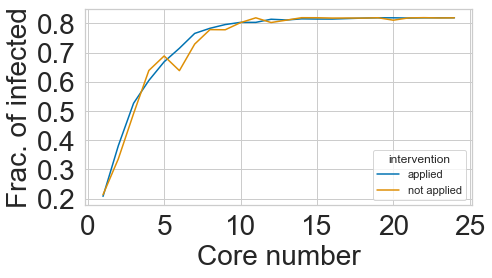

In [19]:
import seaborn as sns 
from ast import literal_eval
# from matplotlib.ticker import MaxNLocator
sns.set(rc={'figure.figsize':(7,4)})
sns.set_style("whitegrid", {'axes.grid' : True})
lw = 3
save = False
output_folder = 'results_final/'

ignore_datasets = ['bin_1','bin_2','bin_4','bin_5', 'congress', 'contact','default']
group_list = ['dataset', 'p']
goodname_algo = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

df = pd.read_csv(os.path.join(output_folder + "propagation_result_exp3.csv"), header=None)
df.columns = ['dataset', 'p', 'algo', 'exp', 'result', 'timestep_results', 'intervention_results']
# print(df.shape)
# print(df.head(15))

# group_list = ['algo',  'p']
for key, item in df[df['intervention_results'].notnull()].groupby(group_list, as_index=False):
    if item['dataset'].values[0] in ignore_datasets:
        continue

    item['algo'] = item['algo'].replace(goodname_algo)
    result_df = pd.DataFrame()
    assert len(item['algo'].unique()) == 1
    
    result = literal_eval(item['intervention_results'].iloc[0])
    # print(result.keys())
    result = [(eid, k, v) for eid in result for k in result[eid] for v in result[eid][k]]
    result_df = result_df.append(pd.DataFrame(result, columns = ['edge id', 'core number', 'infected']), ignore_index=False)
    # print(result_df['edge id'].unique())
    result_df['intervention'] = result_df.apply(lambda x: 'applied' if x['edge id'] != 'nill' else 'not applied', axis=1)

    #Plot mean
    meandf = result_df.groupby(['intervention', 'core number']).mean().reset_index()
    print(meandf.head())
    # print(meandf)
    sns.lineplot(x = 'core number', y = 'infected', hue = 'intervention', palette='colorblind', data=meandf)
    
    plt.xlabel('Core number', fontsize=fontsize)
    plt.ylabel("Frac. of infected", fontsize=fontsize)
    plt.xticks(fontsize=fontsize)
    plt.yticks(fontsize=fontsize)
    plt.tight_layout()
    filename = (" ".join(map(str, key)) + " propagation").replace(" ", "_").replace(".", "")
    if(save):
        plt.savefig("results_final/fig/" + filename + "_intervention.pdf")
    else:
        print(filename)
        plt.show()
        break 
    plt.clf()

Qualitative Plots
===========

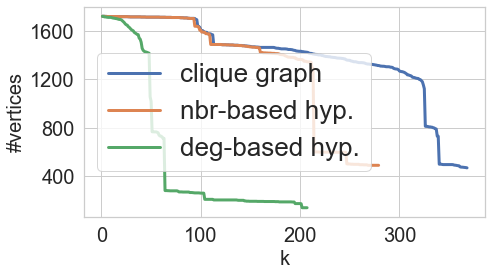

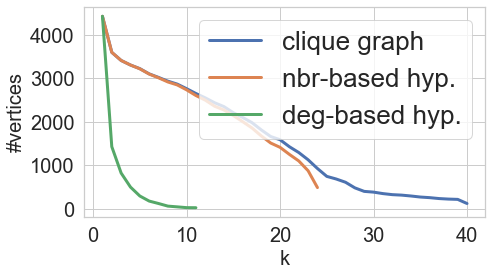

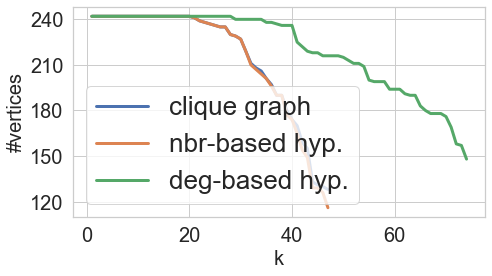

In [12]:
import pickle
import matplotlib.pyplot as plt 
from matplotlib.ticker import MaxNLocator
labelsize = 20
fontsize = 28
# plt.rc('font', family='serif')
# plt.rc('xtick', labelsize= labelsize)
# plt.rc('ytick', labelsize= labelsize)

# plt.style.use('plot.mplstyle')
lw = 3
save = False
_min = 1
_max = 100
def get_core_decomposition(core_numbers):
    _max = max(core_numbers.values())
    freq = { k : 0 for k in range(_min,_max+1)} 
    for node, val in core_numbers.items():
        for i in range(1, val+1):
            freq[i] = freq.get(i, 0)+1
    return freq

# for dataset in ['enron']:
# for dataset in ['congress','enron','contact']:
for dataset in ['congress', 'enron', 'contact']:
    algo_list = ['graph_core', 'naive_nbr', 'naive_degree']
    goodname = {
        'graph_core': 'clique graph',
        'naive_nbr': 'nbr-based hyp.',
        'naive_degree': 'deg-based hyp.'
    }

    fig = plt.figure(figsize=(7, 4))
    ax = fig.add_subplot(1, 1, 1)
    for algo in algo_list:
        fname = "tests/tmp/" + dataset + "_" + algo + ".pkl"
        with open(fname, 'rb') as handle:
            hgDecompose = pickle.load(handle)
            core_base = hgDecompose.core
            core_decomp = get_core_decomposition(core_base)
            x = list(core_decomp.keys())
            y = [core_decomp[i] for i in x]
            plt.plot(x,y, label = goodname[algo], linewidth = lw)
    plt.xlabel('k', fontsize=labelsize)
    plt.ylabel('#vertices', fontsize=labelsize)
    plt.xticks(fontsize=labelsize)
    # plt.xticks()
    plt.yticks(fontsize=labelsize)
    # plt.legend(loc = 'upper right')
    plt.legend(fontsize = fontsize-2)
    ax.yaxis.set_major_locator(MaxNLocator(5))
    ax.xaxis.set_major_locator(MaxNLocator(5)) 
    plt.tight_layout()
    if save:
        plt.savefig('results_final/qualitative/'+ good_name_dataset[dataset]+'.pdf')
    else:
        plt.show()